<a href="https://colab.research.google.com/github/yeeh-l/Signal-System-Hw2020/blob/circleci-project-setup/123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>0417Test-Practice 資工二_B0729066_葉冠志

題目：

(1) A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

 1, Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

 2, Compute the spectrum of a sawtooth wave.

 3, How does the harmonic structure compare to triangle and square waves?<BR>
(2) 建立自己的 github 帳號， 把本題的做法寫成 .ipynb，放在該處， 然後提供連結在本課程筆記簿之中。

In [2]:
# get thinkdsp 

!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

from thinkdsp import Sinusoid
import numpy as np

--2020-04-17 05:44:18--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47512 (46K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.40K  --.-KB/s    in 0.01s   

2020-04-17 05:44:19 (3.15 MB/s) - ‘thinkdsp.py’ saved [47512/47512]

--2020-04-17 05:44:21--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘thi

<HR><H1>三角波:

In [0]:
class GzTrisignal(Sinusoid):
        #triangle wave 

      def evaluate(self, ts):

         θ = ts * 2 * np.pi * self.freq + self.offset

         θ = θ % (2 * np.pi)#前半0~pi 、後半pi~pi2

         x0 = θ *(+2/np.pi) -1
         x1 = θ *(-2/np.pi) +3 

         x = x0*(θ < np.pi) + x1*(θ >= np.pi)  #false = 0 即不會加到x內

         x= x * self.amp
        
         return x

<H3>測試我們當三角波:

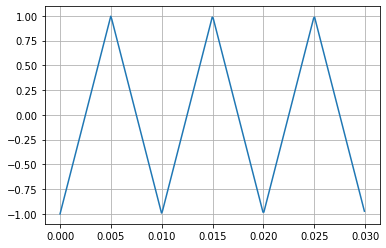

In [5]:
import matplotlib.pylab as pl

Wav= GzTrisignal(freq=100)
Wav.plot()
pl.grid()

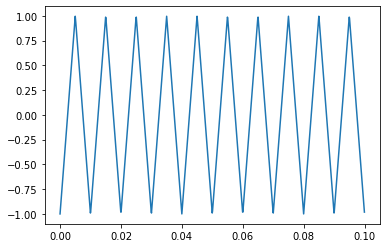

In [0]:
w= Wav.make_wave()
w.segment(duration=0.1).plot()

In [0]:
w.make_audio()

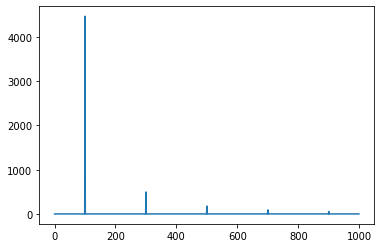

In [0]:
w.make_spectrum().plot(high = 1000)

<HR><H1>方波:

In [0]:
class GzSqrsignal(Sinusoid):
        #sqare wave 

      def evaluate(self, ts):

         θ = ts * 2 * np.pi * self.freq + self.offset

         θ = θ % (2 * np.pi)#前半0~pi 、後半pi~pi2

         #x0 = θ *(+2/np.pi) -1
         #x1 = θ *(-2/np.pi) +3 
         x0 = -1
         x1 = +1
         
         x = x0*(θ < np.pi) + x1*(θ >= np.pi)  #false = 0 即不會加到x內

         x= x * self.amp
        
         return x

<H3>測試我們的方波

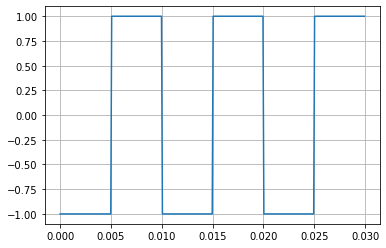

In [0]:
Wav= GzSqrsignal(freq=100)
Wav.plot()
pl.grid()

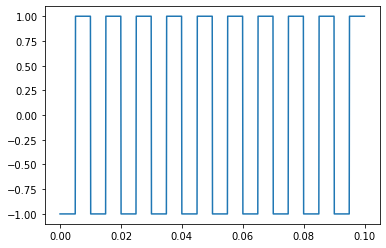

In [0]:
w= Wav.make_wave()
w.segment(duration=0.1).plot()

In [0]:
w.make_audio()

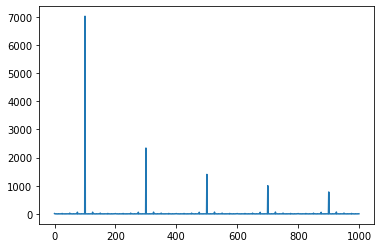

In [0]:
w.make_spectrum().plot(high=1000)

<HR><H1>鋸齒波sawtooth):

In [0]:
class GzSawtsignal(Sinusoid):
        #swatooth wave 

      def evaluate(self, ts):

         θ = ts * 2 * np.pi * self.freq + self.offset

         θ = θ % (2 * np.pi)#前半0~pi 、後半pi~pi2

         #x0 = θ *(+2/np.pi) -1
         #x1 = θ *(-2/np.pi) +3  
         #x0 = -1
         #x1 = +1
         x0 = θ *(+2/np.pi) -1
         x1 = θ *(+2/np.pi) -1    #皆為斜率為正的 (2/pi)*cita-1 
         
         x = x0*(θ < np.pi) + x1*(θ >= np.pi)  #false = 0 即不會加到x內

         x= x * self.amp
        
         return x

<H3>測試我們的鋸齒波

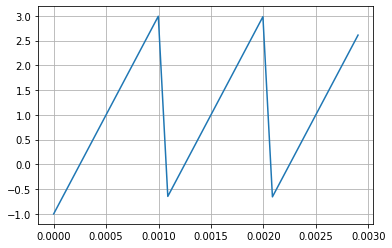

In [8]:
Wav= GzSawtsignal(freq=1000)
Wav.plot()
pl.grid()

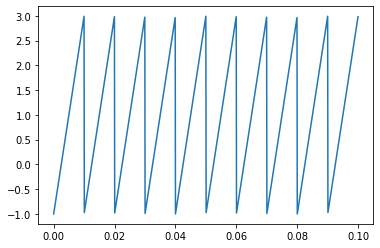

In [0]:
w= Wav.make_wave()
w.segment(duration=0.1).plot()

In [0]:
w.make_audio()

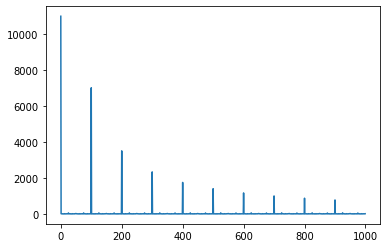

In [0]:
w.make_spectrum().plot(high=1000)

<H1>END
<H4>Ch01-Exercises 資工二_B0729066_葉冠志<HR>